# Introduction to Data Science - Linear Regression

In [188]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

Load the dataframe.

In [189]:
population_df = pd.read_csv('../data/population_df3.csv')
population_df

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,"One-person hh, Age 65-69, %","One-person hh, Age 70-74, %","One-person hh, Age 75-79, %","One-person hh, Age 80-84, %","One-person hh, Age 85, %","Morbidity, Morbidity index","Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index"
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.011049,0.012533,0.008740,0.007091,0.003793,67.586539,69.787493,47.10470,85.867423,76.318461
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.022977,0.025145,0.024277,0.019509,0.017341,67.586539,69.787493,47.10470,85.867423,76.318461
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.015407,0.012552,0.008150,0.004640,0.003391,106.524701,108.962657,110.65974,99.951705,105.484865
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.023286,0.024842,0.019840,0.014227,0.014227,106.524701,108.962657,110.65974,99.951705,105.484865
4,0,0.056744,0.008216,0.000382,0.115017,0.049675,0.065342,0.107375,0.081582,0.138135,...,0.011049,0.012533,0.008740,0.007091,0.003793,67.586539,69.787493,47.10470,85.867423,76.318461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.046091,0.006647,0.000399,0.113049,0.059912,0.053136,0.101443,0.095361,0.100946,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
364,0,0.068623,0.009455,0.000423,0.122246,0.043744,0.078502,0.148989,0.112253,0.144381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
365,1,0.088223,0.017459,0.001057,0.147080,0.040342,0.106738,0.100800,0.129216,0.164055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,0,0.039430,0.002767,0.000000,0.142225,0.100028,0.042197,0.148727,0.036386,0.039568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
green_areas_df = pd.read_csv('../data/alueet.csv')
green_areas_df['nimi_fi'] = green_areas_df['nimi_fi'].str.replace('ä','a')
green_areas_df['nimi_fi'] = green_areas_df['nimi_fi'].str.replace('ö','o')
green_areas_df.head(20)

,id,aluejako,kunta,tunnus,nimi_fi,avoindata:Maavesi_merialue_area,avoindata:Maavesi_merialue_pc,rakennukset_korjattu_area,rakennukset_korjattu_pc,valueet_korjattu_area,valueet_korjattu_pc,kokoalue
0,112867,OSA-ALUE,91,457,Itakeskus,0.000000e+00,0.000000,200871.363268,18.246894,3.761888e+05,34.172505,1.100852e+06
1,112868,OSA-ALUE,91,10,Kruununhaka,5.315931e+05,47.245252,207403.441560,18.432947,1.053360e+05,9.361723,1.125178e+06
2,112869,OSA-ALUE,91,20,Kluuvi,0.000000e+00,0.000000,233779.626648,22.557421,3.713771e+05,35.834217,1.036376e+06
3,112870,OSA-ALUE,91,30,Kaartinkaupunki,7.007853e+04,17.610724,115195.417700,28.948592,7.396867e+04,18.588316,3.979310e+05
4,112871,OSA-ALUE,91,40,Kamppi,1.246587e+03,0.131317,380641.876994,40.097236,2.893736e+03,0.304829,9.492970e+05
5,112872,OSA-ALUE,91,50,Punavuori,1.536400e+04,3.323023,162272.718416,35.097369,2.103841e+04,4.550320,4.623501e+05
6,112873,OSA-ALUE,91,60,Eira,2.168816e+04,10.383264,28661.993202,13.722007,5.027463e+04,24.069113,2.088761e+05
7,112874,OSA-ALUE,91,70,Ullanlinna,6.952018e+05,49.488172,201487.871222,14.342981,1.825383e+05,12.994051,1.404784e+06
8,112875,OSA-ALUE,91,80,Katajanokka,1.294700e+06,69.276983,137840.337977,7.375577,1.525130e+05,8.160685,1.868875e+06
9,112876,OSA-ALUE,91,90,Kaivopuisto,2.000542e+06,81.129548,37339.975217,1.514277,2.982444e+05,12.094940,2.465861e+06


In [191]:
population_df = pd.merge(left=population_df, right=green_areas_df[['nimi_fi','valueet_korjattu_pc']], how='left', left_on=['name'], right_on=['nimi_fi'])
population_df = population_df.rename(columns={'valueet_korjattu_pc': 'green area %'})
population_df = population_df.drop('nimi_fi', axis=1)
population_df = population_df.drop('Area', axis=1)
population_df = population_df.drop('Area no-dots', axis=1)
population_df.head(20)

,Gender,Education % 15-24 years Second degree and special vocational training degree,Education % 15-24 years Lowest higher and lower university level,Education % 15-24 years Higher university degree and research training,Education % 15-24 years All levels of education,Education % 15-24 years Elementary or unknown,Education % 15-24 years Total graduates,Education % 25-44 years Second degree and special vocational training degree,Education % 25-44 years Lowest higher and lower university level,Education % 25-44 years Higher university degree and research training,...,"One-person hh, Age 70-74, %","One-person hh, Age 75-79, %","One-person hh, Age 80-84, %","One-person hh, Age 85, %","Morbidity, Morbidity index","Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index",green area %
0,0,0.059870,0.008553,0.000342,0.116319,0.047554,0.068765,0.105371,0.083134,0.157030,...,0.012533,0.008740,0.007091,0.003793,67.586539,69.787493,47.104700,85.867423,76.318461,9.361723
1,1,0.079023,0.016667,0.000575,0.145402,0.049138,0.096264,0.074138,0.103736,0.157471,...,0.025145,0.024277,0.019509,0.017341,67.586539,69.787493,47.104700,85.867423,76.318461,9.361723
2,0,0.058338,0.007025,0.000000,0.100794,0.035431,0.065363,0.168601,0.136225,0.140195,...,0.012552,0.008150,0.004640,0.003391,106.524701,108.962657,110.659740,99.951705,105.484865,18.843288
3,1,0.088615,0.018624,0.001502,0.143286,0.034545,0.108741,0.123160,0.141484,0.147792,...,0.024842,0.019840,0.014227,0.014227,106.524701,108.962657,110.659740,99.951705,105.484865,18.843288
4,0,0.056744,0.008216,0.000382,0.115017,0.049675,0.065342,0.107375,0.081582,0.138135,...,0.012533,0.008740,0.007091,0.003793,67.586539,69.787493,47.104700,85.867423,76.318461,NaN
5,1,0.069618,0.012837,0.000494,0.130184,0.047235,0.082949,0.070441,0.098255,0.145161,...,0.025145,0.024277,0.019509,0.017341,67.586539,69.787493,47.104700,85.867423,76.318461,NaN
6,0,0.064842,0.009263,0.000421,0.111579,0.037053,0.074526,0.167158,0.135579,0.182316,...,0.012552,0.008150,0.004640,0.003391,106.524701,108.962657,110.659740,99.951705,105.484865,1.860516
7,1,0.089182,0.017449,0.003102,0.159752,0.050019,0.109732,0.107406,0.141915,0.182629,...,0.024842,0.019840,0.014227,0.014227,106.524701,108.962657,110.659740,99.951705,105.484865,1.860516
8,0,0.061803,0.010049,0.000603,0.116270,0.043815,0.072455,0.127625,0.089740,0.146116,...,0.009661,0.007445,0.006204,0.005761,65.665101,73.060317,43.092436,80.842549,67.995023,NaN
9,1,0.081641,0.018190,0.001015,0.139086,0.038240,0.100846,0.094924,0.103130,0.165651,...,0.023986,0.023680,0.016042,0.015278,65.665101,73.060317,43.092436,80.842549,67.995023,NaN


Combine age related columns

In [192]:
population_df['Lowest higher and lower university level'] = \
    population_df['Education % 15-24 years Lowest higher and lower university level'] + \
    population_df['Education % 25-44 years Lowest higher and lower university level'] + \
    population_df['Education % 45-64 years Lowest higher and lower university level'] + \
    population_df['Education % 65 and over Lowest higher and lower university level']
population_df = population_df.drop(['Education % 15-24 years Lowest higher and lower university level',
                                    'Education % 25-44 years Lowest higher and lower university level',
                                    'Education % 45-64 years Lowest higher and lower university level',
                                    'Education % 65 and over Lowest higher and lower university level'], axis=1)

In [193]:
population_df['Second degree and special vocational training degree'] = \
    population_df['Education % 15-24 years Second degree and special vocational training degree'] + \
    population_df['Education % 25-44 years Second degree and special vocational training degree'] + \
    population_df['Education % 45-64 years Second degree and special vocational training degree'] + \
    population_df['Education % 65 and over Second degree and special vocational training degree']
population_df = population_df.drop(['Education % 15-24 years Second degree and special vocational training degree',
                                    'Education % 25-44 years Second degree and special vocational training degree',
                                    'Education % 45-64 years Second degree and special vocational training degree',
                                    'Education % 65 and over Second degree and special vocational training degree'], axis=1)

In [194]:
population_df['Higher university degree and research training'] = \
    population_df['Education % 15-24 years Higher university degree and research training'] + \
    population_df['Education % 25-44 years Higher university degree and research training'] + \
    population_df['Education % 45-64 years Higher university degree and research training'] + \
    population_df['Education % 65 and over Higher university degree and research training']
population_df = population_df.drop(['Education % 15-24 years Higher university degree and research training',
                                    'Education % 25-44 years Higher university degree and research training',
                                    'Education % 45-64 years Higher university degree and research training',
                                    'Education % 65 and over Higher university degree and research training'], axis=1)

In [195]:
population_df['Elementary or unknown'] = \
    population_df['Education % 15-24 years Elementary or unknown'] + \
    population_df['Education % 25-44 years Elementary or unknown'] + \
    population_df['Education % 45-64 years Elementary or unknown'] + \
    population_df['Education % 65 and over Elementary or unknown']
population_df = population_df.drop(['Education % 15-24 years Elementary or unknown',
                                    'Education % 25-44 years Elementary or unknown',
                                    'Education % 45-64 years Elementary or unknown',
                                    'Education % 65 and over Elementary or unknown'], axis=1)

In [196]:
population_df['One-person hh'] = \
    population_df['One-person hh, Age -19, %'] + \
    population_df['One-person hh, Age 20-29, %'] + \
    population_df['One-person hh, Age 30-39, %'] + \
    population_df['One-person hh, Age 40-49, %'] + \
    population_df['One-person hh, Age 50-59, %'] + \
    population_df['One-person hh, Age 60-64, %'] + \
    population_df['One-person hh, Age 65-69, %'] + \
    population_df['One-person hh, Age 70-74, %'] + \
    population_df['One-person hh, Age 75-79, %'] + \
    population_df['One-person hh, Age 80-84, %'] + \
    population_df['One-person hh, Age 85, %']
population_df = population_df.drop(['One-person hh, Age -19, %',
                                    'One-person hh, Age 20-29, %',
                                    'One-person hh, Age 30-39, %',
                                    'One-person hh, Age 40-49, %',
                                    'One-person hh, Age 50-59, %',
                                    'One-person hh, Age 60-64, %',
                                    'One-person hh, Age 65-69, %',
                                    'One-person hh, Age 70-74, %',
                                    'One-person hh, Age 75-79, %',
                                    'One-person hh, Age 80-84, %',
                                    'One-person hh, Age 85, %'], axis=1)

Filter only basic level districs.

In [197]:
population_df = population_df[~population_df['name'].str.contains('peruspiiri')]
population_df

,Gender,Education % 15-24 years All levels of education,Education % 15-24 years Total graduates,Education % 25-44 years All levels of education,Education % 25-44 years Total graduates,Education % 45-64 years All levels of education,Education % 45-64 years Total graduates,Education % 65 and over All levels of education,Education % 65 and over Total graduates,0-14 year olds,...,"Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index",green area %,Lowest higher and lower university level,Second degree and special vocational training degree,Higher university degree and research training,Elementary or unknown,One-person hh
0,0,0.116319,0.068765,0.396510,0.345535,0.300034,0.275744,0.187137,0.164215,0.053798,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.197058,0.273007,0.384194,0.145741,0.215369
1,1,0.145402,0.096264,0.365805,0.335345,0.266954,0.254310,0.221839,0.188218,0.053798,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.261494,0.235920,0.376724,0.125862,0.278179
2,0,0.100794,0.065363,0.528406,0.445021,0.227245,0.192120,0.143555,0.104154,0.027587,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.222053,0.351863,0.232743,0.193341,0.379298
3,1,0.143286,0.108741,0.456594,0.412436,0.177831,0.154701,0.222289,0.156203,0.028588,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.274557,0.325323,0.232202,0.167918,0.423808
6,0,0.111579,0.074526,0.546947,0.485053,0.242526,0.212211,0.098947,0.081684,0.067889,...,108.962657,110.65974,99.951705,105.484865,1.860516,0.233684,0.318316,0.301474,0.146526,0.379298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,1,0.113049,0.053136,0.348459,0.297750,0.285197,0.244293,0.253295,0.163789,0.078919,...,NaN,NaN,NaN,NaN,NaN,0.250220,0.300737,0.208011,0.241032,NaN
364,0,0.122246,0.078502,0.475664,0.405623,0.250860,0.213359,0.151230,0.119868,0.055887,...,NaN,NaN,NaN,NaN,NaN,0.208454,0.328470,0.280427,0.182649,NaN
365,1,0.147080,0.106738,0.430234,0.394072,0.223851,0.203616,0.198834,0.150756,0.053420,...,NaN,NaN,NaN,NaN,NaN,0.270250,0.289132,0.295801,0.144818,NaN
366,0,0.142225,0.042197,0.500415,0.224682,0.271859,0.147067,0.085501,0.046624,0.049830,...,NaN,NaN,NaN,NaN,NaN,0.080797,0.302297,0.077476,0.539430,NaN


Set distric code to index.

In [198]:
population_df = population_df.drop(['municipality', 'name'], axis=1)
population_df = population_df.set_index('code')
population_df.columns = population_df.columns.get_level_values(0)
population_df

,Gender,Education % 15-24 years All levels of education,Education % 15-24 years Total graduates,Education % 25-44 years All levels of education,Education % 25-44 years Total graduates,Education % 45-64 years All levels of education,Education % 45-64 years Total graduates,Education % 65 and over All levels of education,Education % 65 and over Total graduates,0-14 year olds,...,"Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index",green area %,Lowest higher and lower university level,Second degree and special vocational training degree,Higher university degree and research training,Elementary or unknown,One-person hh
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.116319,0.068765,0.396510,0.345535,0.300034,0.275744,0.187137,0.164215,0.053798,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.197058,0.273007,0.384194,0.145741,0.215369
10,1,0.145402,0.096264,0.365805,0.335345,0.266954,0.254310,0.221839,0.188218,0.053798,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.261494,0.235920,0.376724,0.125862,0.278179
101,0,0.100794,0.065363,0.528406,0.445021,0.227245,0.192120,0.143555,0.104154,0.027587,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.222053,0.351863,0.232743,0.193341,0.379298
101,1,0.143286,0.108741,0.456594,0.412436,0.177831,0.154701,0.222289,0.156203,0.028588,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.274557,0.325323,0.232202,0.167918,0.423808
102,0,0.111579,0.074526,0.546947,0.485053,0.242526,0.212211,0.098947,0.081684,0.067889,...,108.962657,110.65974,99.951705,105.484865,1.860516,0.233684,0.318316,0.301474,0.146526,0.379298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.113049,0.053136,0.348459,0.297750,0.285197,0.244293,0.253295,0.163789,0.078919,...,NaN,NaN,NaN,NaN,NaN,0.250220,0.300737,0.208011,0.241032,NaN
998,0,0.122246,0.078502,0.475664,0.405623,0.250860,0.213359,0.151230,0.119868,0.055887,...,NaN,NaN,NaN,NaN,NaN,0.208454,0.328470,0.280427,0.182649,NaN
998,1,0.147080,0.106738,0.430234,0.394072,0.223851,0.203616,0.198834,0.150756,0.053420,...,NaN,NaN,NaN,NaN,NaN,0.270250,0.289132,0.295801,0.144818,NaN


Remove columns which show total graduates and all levels of education.

In [199]:
total_columns = [col for col in population_df.columns if 'Total' in col]
population_df = population_df.drop(columns=total_columns, axis=1)
all_levels_columns = [col for col in population_df.columns if 'All levels' in col]
population_df = population_df.drop(columns=all_levels_columns, axis=1)
population_df

,Gender,0-14 year olds,Pensioners and others,"Students, school children, conscripts and civil service",Employed,Unemployed,Labor force,Outside the labor force,Taxable income per housing association,Taxable income per person,...,"Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index",green area %,Lowest higher and lower university level,Second degree and special vocational training degree,Higher university degree and research training,Elementary or unknown,One-person hh
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.053798,0.096028,NaN,0.257003,0.020070,0.277073,0.184111,81443.0,44080.0,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.197058,0.273007,0.384194,0.145741,0.215369
10,1,0.053798,0.128502,NaN,0.286969,0.019652,0.306620,0.232195,81443.0,44080.0,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.261494,0.235920,0.376724,0.125862,0.278179
101,0,0.027587,0.093625,NaN,0.300886,0.036592,0.337479,0.158090,48032.0,30519.0,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.222053,0.351863,0.232743,0.193341,0.379298
101,1,0.028588,0.126072,NaN,0.274871,0.029017,0.303888,0.200543,48032.0,30519.0,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.274557,0.325323,0.232202,0.167918,0.423808
102,0,0.067889,0.058191,NaN,0.309646,0.017281,0.326926,0.159760,71436.0,36204.0,...,108.962657,110.65974,99.951705,105.484865,1.860516,0.233684,0.318316,0.301474,0.146526,0.379298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.078919,0.144400,0.041963,0.231943,0.027448,0.259391,0.265282,55559.0,28197.0,...,NaN,NaN,NaN,NaN,NaN,0.250220,0.300737,0.208011,0.241032,NaN
998,0,0.055887,0.088305,0.039989,0.256989,0.027535,0.284524,0.184181,62736.0,36839.0,...,NaN,NaN,NaN,NaN,NaN,0.208454,0.328470,0.280427,0.182649,NaN
998,1,0.053420,0.120567,0.047457,0.286501,0.023280,0.309781,0.221443,62736.0,36839.0,...,NaN,NaN,NaN,NaN,NaN,0.270250,0.289132,0.295801,0.144818,NaN


In [200]:
population_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,300.0,0.500000,0.500835,0.000000,0.000000,0.500000,1.000000,1.000000
0-14 year olds,257.0,0.074899,0.023287,0.000000,0.059838,0.076039,0.090235,0.170732
Pensioners and others,252.0,0.114015,0.034505,0.032012,0.091821,0.113204,0.134710,0.234534
"Students, school children, conscripts and civil service",162.0,0.043336,0.019794,0.018293,0.036096,0.040774,0.045796,0.207317
Employed,258.0,0.242988,0.039504,0.093281,0.217870,0.236698,0.265685,0.390476
Unemployed,243.0,0.027712,0.011263,0.008174,0.019979,0.025899,0.033460,0.102003
Labor force,258.0,0.269855,0.037207,0.124213,0.245186,0.260155,0.289656,0.396825
Outside the labor force,258.0,0.230145,0.039659,0.103647,0.206007,0.232542,0.257084,0.334599
Taxable income per housing association,248.0,68707.185484,41099.528480,14783.000000,44030.500000,54913.500000,77884.750000,291439.000000
Taxable income per person,248.0,33794.435484,17024.282175,12049.000000,23640.750000,29315.500000,36294.000000,120998.000000


## Multicollinearity

Correlation of variables.

In [201]:
corr = population_df.corr()

<AxesSubplot:>

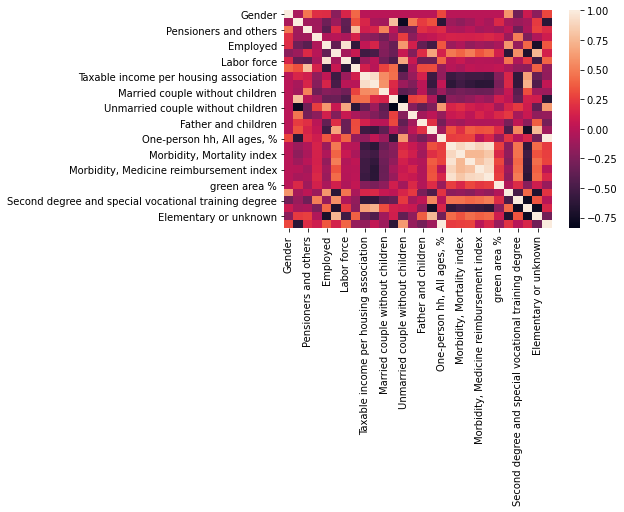

In [202]:
sns.heatmap(corr)

<AxesSubplot:>

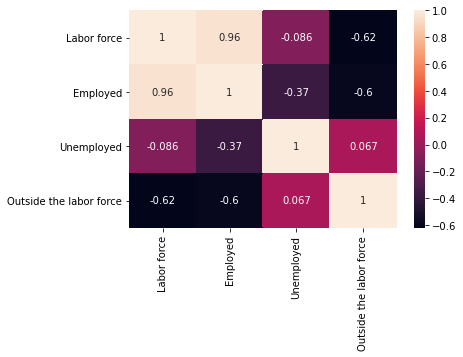

In [203]:
labor_force = population_df[['Labor force', 'Employed', 'Unemployed', 'Outside the labor force']]
corr = labor_force.corr()
sns.heatmap(corr, annot=True)

In [204]:
population_df = population_df.drop(columns=['Labor force'], axis=1)
population_df

,Gender,0-14 year olds,Pensioners and others,"Students, school children, conscripts and civil service",Employed,Unemployed,Outside the labor force,Taxable income per housing association,Taxable income per person,Married couple without children,...,"Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index",green area %,Lowest higher and lower university level,Second degree and special vocational training degree,Higher university degree and research training,Elementary or unknown,One-person hh
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.053798,0.096028,NaN,0.257003,0.020070,0.184111,81443.0,44080.0,0.342429,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.197058,0.273007,0.384194,0.145741,0.215369
10,1,0.053798,0.128502,NaN,0.286969,0.019652,0.232195,81443.0,44080.0,0.342429,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.261494,0.235920,0.376724,0.125862,0.278179
101,0,0.027587,0.093625,NaN,0.300886,0.036592,0.158090,48032.0,30519.0,0.320584,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.222053,0.351863,0.232743,0.193341,0.379298
101,1,0.028588,0.126072,NaN,0.274871,0.029017,0.200543,48032.0,30519.0,0.320584,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.274557,0.325323,0.232202,0.167918,0.423808
102,0,0.067889,0.058191,NaN,0.309646,0.017281,0.159760,71436.0,36204.0,0.291057,...,108.962657,110.65974,99.951705,105.484865,1.860516,0.233684,0.318316,0.301474,0.146526,0.379298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.078919,0.144400,0.041963,0.231943,0.027448,0.265282,55559.0,28197.0,0.299079,...,NaN,NaN,NaN,NaN,NaN,0.250220,0.300737,0.208011,0.241032,NaN
998,0,0.055887,0.088305,0.039989,0.256989,0.027535,0.184181,62736.0,36839.0,0.284940,...,NaN,NaN,NaN,NaN,NaN,0.208454,0.328470,0.280427,0.182649,NaN
998,1,0.053420,0.120567,0.047457,0.286501,0.023280,0.221443,62736.0,36839.0,0.284940,...,NaN,NaN,NaN,NaN,NaN,0.270250,0.289132,0.295801,0.144818,NaN


<AxesSubplot:>

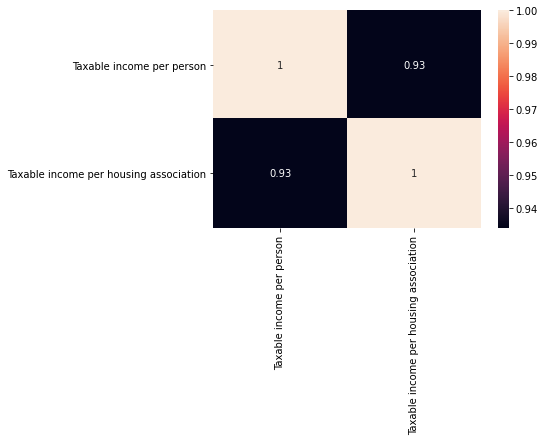

In [205]:
taxable_income = population_df[['Taxable income per person', 'Taxable income per housing association']]
corr = taxable_income.corr()
sns.heatmap(corr, annot=True)

In [206]:
population_df = population_df.drop(columns=['Taxable income per person'], axis=1)
population_df

,Gender,0-14 year olds,Pensioners and others,"Students, school children, conscripts and civil service",Employed,Unemployed,Outside the labor force,Taxable income per housing association,Married couple without children,Married couple and children,...,"Morbidity, Mortality index","Morbidity, Disability pension index","Morbidity, Medicine reimbursement index","Morbidity, Chronic diseases index",green area %,Lowest higher and lower university level,Second degree and special vocational training degree,Higher university degree and research training,Elementary or unknown,One-person hh
code,,,,,,,,,,,,,,,,,,,,,
10,0,0.053798,0.096028,NaN,0.257003,0.020070,0.184111,81443.0,0.342429,0.231140,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.197058,0.273007,0.384194,0.145741,0.215369
10,1,0.053798,0.128502,NaN,0.286969,0.019652,0.232195,81443.0,0.342429,0.231140,...,69.787493,47.10470,85.867423,76.318461,9.361723,0.261494,0.235920,0.376724,0.125862,0.278179
101,0,0.027587,0.093625,NaN,0.300886,0.036592,0.158090,48032.0,0.320584,0.129346,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.222053,0.351863,0.232743,0.193341,0.379298
101,1,0.028588,0.126072,NaN,0.274871,0.029017,0.200543,48032.0,0.320584,0.129346,...,108.962657,110.65974,99.951705,105.484865,18.843288,0.274557,0.325323,0.232202,0.167918,0.423808
102,0,0.067889,0.058191,NaN,0.309646,0.017281,0.159760,71436.0,0.291057,0.194038,...,108.962657,110.65974,99.951705,105.484865,1.860516,0.233684,0.318316,0.301474,0.146526,0.379298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1,0.078919,0.144400,0.041963,0.231943,0.027448,0.265282,55559.0,0.299079,0.275851,...,NaN,NaN,NaN,NaN,NaN,0.250220,0.300737,0.208011,0.241032,NaN
998,0,0.055887,0.088305,0.039989,0.256989,0.027535,0.184181,62736.0,0.284940,0.202834,...,NaN,NaN,NaN,NaN,NaN,0.208454,0.328470,0.280427,0.182649,NaN
998,1,0.053420,0.120567,0.047457,0.286501,0.023280,0.221443,62736.0,0.284940,0.202834,...,NaN,NaN,NaN,NaN,NaN,0.270250,0.289132,0.295801,0.144818,NaN


<AxesSubplot:>

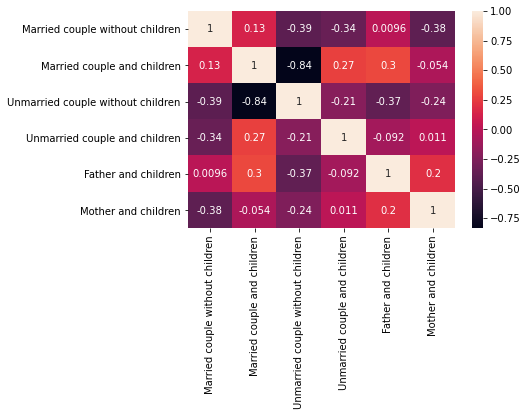

In [207]:
family_status = population_df[['Married couple without children',
                               'Married couple and children',
                               'Unmarried couple without children',
                               'Unmarried couple and children',
                               'Father and children',
                               'Mother and children']]
corr = family_status.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

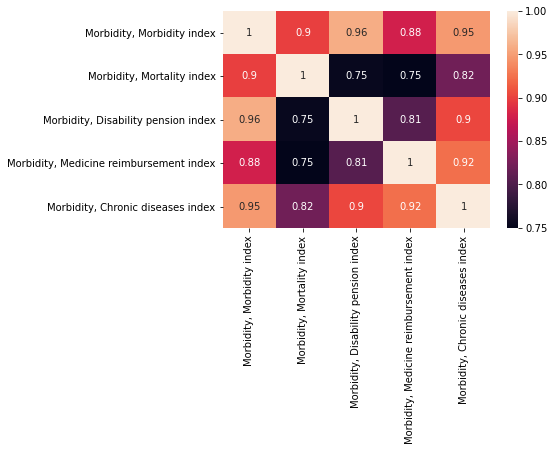

In [208]:
morbidity = population_df.filter(regex='Morbidity')
corr = morbidity.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

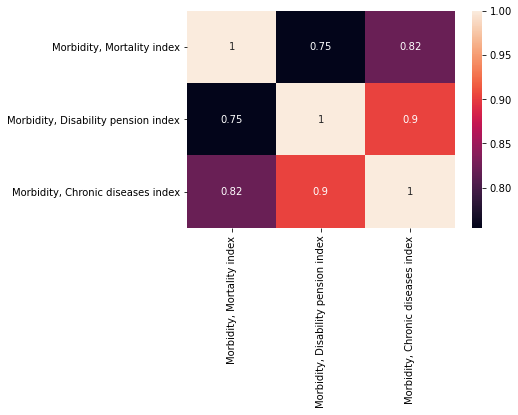

In [209]:
population_df = population_df.drop(columns=['Morbidity, Morbidity index', 'Morbidity, Medicine reimbursement index'], axis=1)
morbidity = population_df.filter(regex='Morbidity')
corr = morbidity.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:>

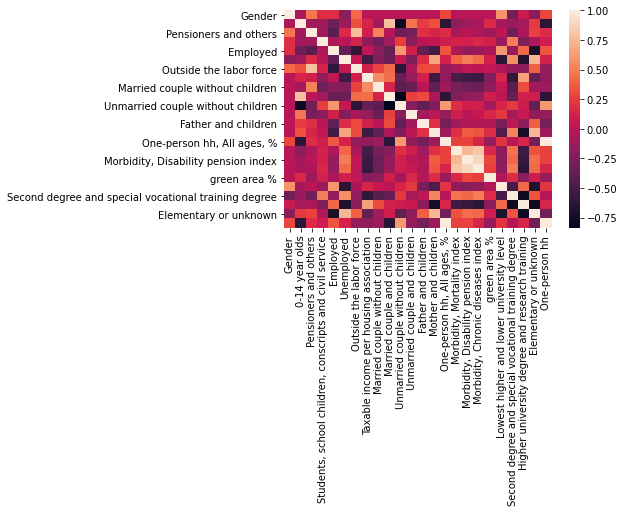

In [210]:
corr = population_df.corr()
sns.heatmap(corr)

## Linear Regression

In [211]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 999
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Gender                                                   300 non-null    int64  
 1   0-14 year olds                                           257 non-null    float64
 2   Pensioners and others                                    252 non-null    float64
 3   Students, school children, conscripts and civil service  162 non-null    float64
 4   Employed                                                 258 non-null    float64
 5   Unemployed                                               243 non-null    float64
 6   Outside the labor force                                  258 non-null    float64
 7   Taxable income per housing association                   248 non-null    float64
 8   Married couple without childr

In [212]:
population_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,300.0,0.500000,0.500835,0.000000,0.000000,0.500000,1.000000,1.000000
0-14 year olds,257.0,0.074899,0.023287,0.000000,0.059838,0.076039,0.090235,0.170732
Pensioners and others,252.0,0.114015,0.034505,0.032012,0.091821,0.113204,0.134710,0.234534
"Students, school children, conscripts and civil service",162.0,0.043336,0.019794,0.018293,0.036096,0.040774,0.045796,0.207317
Employed,258.0,0.242988,0.039504,0.093281,0.217870,0.236698,0.265685,0.390476
Unemployed,243.0,0.027712,0.011263,0.008174,0.019979,0.025899,0.033460,0.102003
Outside the labor force,258.0,0.230145,0.039659,0.103647,0.206007,0.232542,0.257084,0.334599
Taxable income per housing association,248.0,68707.185484,41099.528480,14783.000000,44030.500000,54913.500000,77884.750000,291439.000000
Married couple without children,248.0,0.292522,0.055558,0.145946,0.256379,0.294542,0.326415,0.503704
Married couple and children,248.0,0.259173,0.070951,0.077304,0.221114,0.253497,0.295939,0.490826


In [213]:
population_df_all = population_df.ffill(axis=1)

In [214]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 999
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Gender                                                   300 non-null    int64  
 1   0-14 year olds                                           257 non-null    float64
 2   Pensioners and others                                    252 non-null    float64
 3   Students, school children, conscripts and civil service  162 non-null    float64
 4   Employed                                                 258 non-null    float64
 5   Unemployed                                               243 non-null    float64
 6   Outside the labor force                                  258 non-null    float64
 7   Taxable income per housing association                   248 non-null    float64
 8   Married couple without childr

In [215]:
population_df_all = population_df_all.dropna()

In [216]:
population_df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 10 to 999
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Gender                                                   300 non-null    float64
 1   0-14 year olds                                           300 non-null    float64
 2   Pensioners and others                                    300 non-null    float64
 3   Students, school children, conscripts and civil service  300 non-null    float64
 4   Employed                                                 300 non-null    float64
 5   Unemployed                                               300 non-null    float64
 6   Outside the labor force                                  300 non-null    float64
 7   Taxable income per housing association                   300 non-null    float64
 8   Married couple without childr

In [217]:
target = population_df_all['green area %']
features = population_df_all.drop('green area %', axis=1)

In [218]:
features.columns

Index(['Gender', '0-14 year olds', 'Pensioners and others',
       'Students, school children, conscripts and civil service', 'Employed',
       'Unemployed', 'Outside the labor force',
       'Taxable income per housing association',
       'Married couple without children', 'Married couple and children',
       'Unmarried couple without children', 'Unmarried couple and children',
       'Father and children', 'Mother and children',
       'One-person hh, All ages, %', 'Morbidity, Mortality index',
       'Morbidity, Disability pension index',
       'Morbidity, Chronic diseases index',
       'Lowest higher and lower university level',
       'Second degree and special vocational training degree',
       'Higher university degree and research training',
       'Elementary or unknown', 'One-person hh'],
      dtype='object')

In [219]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [220]:
model_all = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:           green area %   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     9.070
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.10e-21
Time:                        18:10:06   Log-Likelihood:                -1030.1
No. Observations:                 240   AIC:                             2108.
Df Residuals:                     216   BIC:                             2192.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [221]:
X_test = sm.add_constant(X_test)
y_pred = model_all.predict(X_test)

In [222]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 17.52
Mean Squared Error: 493.71
R-squared: -0.25


In [224]:
y_pred = model_all.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

-0.25289620201009333


## Feature selection

In [225]:
population_df_feature_selection = population_df.dropna()
population_df_feature_selection.isna().sum()

Gender                                                     0
0-14 year olds                                             0
Pensioners and others                                      0
Students, school children, conscripts and civil service    0
Employed                                                   0
Unemployed                                                 0
Outside the labor force                                    0
Taxable income per housing association                     0
Married couple without children                            0
Married couple and children                                0
Unmarried couple without children                          0
Unmarried couple and children                              0
Father and children                                        0
Mother and children                                        0
One-person hh, All ages, %                                 0
Morbidity, Mortality index                                 0
Morbidity, Disability pe

In [226]:
population_df_feature_selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 111 to 80
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Gender                                                   141 non-null    int64  
 1   0-14 year olds                                           141 non-null    float64
 2   Pensioners and others                                    141 non-null    float64
 3   Students, school children, conscripts and civil service  141 non-null    float64
 4   Employed                                                 141 non-null    float64
 5   Unemployed                                               141 non-null    float64
 6   Outside the labor force                                  141 non-null    float64
 7   Taxable income per housing association                   141 non-null    float64
 8   Married couple without childr

In [227]:
large_values = (population_df_feature_selection > 1e10).any()
print(large_values)

Gender                                                     False
0-14 year olds                                             False
Pensioners and others                                      False
Students, school children, conscripts and civil service    False
Employed                                                   False
Unemployed                                                 False
Outside the labor force                                    False
Taxable income per housing association                     False
Married couple without children                            False
Married couple and children                                False
Unmarried couple without children                          False
Unmarried couple and children                              False
Father and children                                        False
Mother and children                                        False
One-person hh, All ages, %                                 False
Morbidity, Mortality inde

In [228]:
is_infinite = np.isinf(population_df_feature_selection).any()
print(is_infinite)

Gender                                                     False
0-14 year olds                                             False
Pensioners and others                                      False
Students, school children, conscripts and civil service    False
Employed                                                   False
Unemployed                                                 False
Outside the labor force                                    False
Taxable income per housing association                     False
Married couple without children                            False
Married couple and children                                False
Unmarried couple without children                          False
Unmarried couple and children                              False
Father and children                                        False
Mother and children                                        False
One-person hh, All ages, %                                 False
Morbidity, Mortality inde

In [229]:
threshold = 2
outlier_mask = (abs(stats.zscore(population_df_feature_selection)) > threshold).any(axis=1)
population_df_feature_selection_no_outliers = population_df_feature_selection[~outlier_mask]

In [230]:
population_df_feature_selection_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 111 to 80
Data columns (total 24 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Gender                                                   89 non-null     int64  
 1   0-14 year olds                                           89 non-null     float64
 2   Pensioners and others                                    89 non-null     float64
 3   Students, school children, conscripts and civil service  89 non-null     float64
 4   Employed                                                 89 non-null     float64
 5   Unemployed                                               89 non-null     float64
 6   Outside the labor force                                  89 non-null     float64
 7   Taxable income per housing association                   89 non-null     float64
 8   Married couple without childre

In [231]:
target = population_df_feature_selection_no_outliers['green area %']
features = population_df_feature_selection_no_outliers.drop('green area %', axis=1)

In [232]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [233]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [234]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]), population_df_feature_selection_no_outliers.columns[i])

Feature 0: 1.971682 Gender
Feature 1: 0.402702 0-14 year olds
Feature 2: 1.777383 Pensioners and others
Feature 3: 4.915641 Students, school children, conscripts and civil service
Feature 4: 1.513537 Employed
Feature 5: 0.553392 Unemployed
Feature 6: 1.940379 Outside the labor force
Feature 7: 9.596490 Taxable income per housing association
Feature 8: 4.523097 Married couple without children
Feature 9: 1.702604 Married couple and children
Feature 10: 0.807804 Unmarried couple without children
Feature 11: 1.332800 Unmarried couple and children
Feature 12: 0.485039 Father and children
Feature 13: 2.945198 Mother and children
Feature 14: 7.266785 One-person hh, All ages, %
Feature 15: 0.293085 Morbidity, Mortality index
Feature 16: 10.160457 Morbidity, Disability pension index
Feature 17: 2.664687 Morbidity, Chronic diseases index
Feature 18: 1.516631 green area %
Feature 19: 0.702831 Lowest higher and lower university level
Feature 20: 0.150857 Second degree and special vocational traini

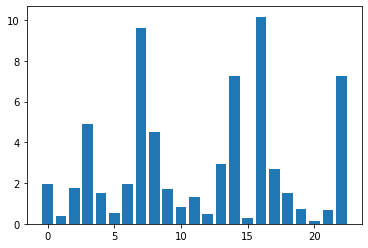

In [235]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

A bar chart of the feature importance scores for each input feature is created.
The plot clearly shows 6
features are a lot more important than the other features.

In [236]:
population_df_fs = population_df_feature_selection[['Students, school children, conscripts and civil service',
                                                    'Taxable income per housing association',
                                                    'Married couple without children',
                                                    'One-person hh, All ages, %',
                                                    'Morbidity, Disability pension index',
                                                    'Elementary or unknown',
                                                    'green area %']]

In [237]:
target_fs = population_df_fs['green area %']
features_fs = population_df_fs.drop('green area %', axis=1)

In [238]:
X_train, X_test, y_train, y_test = train_test_split(features_fs, target_fs, test_size=0.2, random_state=42)

In [239]:
model_fs = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model_fs.summary())

                            OLS Regression Results                            
Dep. Variable:           green area %   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     6.816
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        18:10:48   Log-Likelihood:                -475.70
No. Observations:                 112   AIC:                             965.4
Df Residuals:                     105   BIC:                             984.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [240]:
X_test = sm.add_constant(X_test)
y_pred = model_fs.predict(X_test)

In [241]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Absolute Error: 14.05
Mean Squared Error: 319.15
R-squared: 0.02


In [242]:
y_pred = model_fs.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.01596623645063333


## Cross-validation

In [243]:
target_fs = population_df_fs['green area %']
features_fs = population_df_fs.drop('green area %', axis=1)

In [244]:
X_train, X_test, y_train, y_test = train_test_split(features_fs, target_fs, test_size=0.2, random_state=42)

In [245]:
model = LinearRegression()

In [246]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds)
scores  

array([-0.1542421 ,  0.26946306,  0.42659836,  0.13055451, -0.9283079 ])

In [247]:
hyper_params = [{'n_features_to_select': list(range(1, 14))}]

In [248]:
len(X_train.columns)

6

In [249]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)  

In [250]:
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [251]:
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             return_train_score=True, scoring='r2', verbose=1)

In [252]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003068,3.675310e-04,0.000875,1.941087e-04,1,{'n_features_to_select': 1},-0.091091,0.304633,0.212189,-0.021140,...,-0.012631,0.270022,2,0.203515,0.088283,0.131749,0.170654,0.196859,0.158212,0.043107
1,0.003000,4.422006e-07,0.000400,4.898625e-04,2,{'n_features_to_select': 2},-0.228106,0.271359,0.206615,-0.042517,...,-0.054379,0.277510,11,0.207498,0.092009,0.132100,0.175028,0.198003,0.160928,0.043181
2,0.002600,4.902908e-04,0.001000,9.416779e-07,3,{'n_features_to_select': 3},-0.256658,0.271048,0.204927,-0.089010,...,-0.071703,0.283726,12,0.210215,0.093127,0.133253,0.181914,0.199518,0.163605,0.044013
3,0.001600,4.905250e-04,0.001199,3.991366e-04,4,{'n_features_to_select': 4},-0.274099,0.272177,0.205269,-0.097287,...,-0.076246,0.286075,13,0.210605,0.093160,0.133326,0.182358,0.199544,0.163799,0.044117
4,0.002000,1.784161e-07,0.001000,4.101908e-07,5,{'n_features_to_select': 5},-0.136758,0.299387,0.411762,0.101698,...,0.005419,0.376635,1,0.300347,0.228305,0.222959,0.275582,0.338660,0.273171,0.043743
5,0.001400,4.899209e-04,0.001000,7.893059e-07,6,{'n_features_to_select': 6},-0.154242,0.269463,0.426598,0.130555,...,-0.051187,0.478349,3,0.310604,0.253401,0.234993,0.284121,0.358849,0.288393,0.043707
6,0.001000,8.341244e-07,0.001000,4.623108e-07,7,{'n_features_to_select': 7},-0.154242,0.269463,0.426598,0.130555,...,-0.051187,0.478349,3,0.310604,0.253401,0.234993,0.284121,0.358849,0.288393,0.043707
7,0.001000,1.907349e-07,0.001000,5.309834e-07,8,{'n_features_to_select': 8},-0.154242,0.269463,0.426598,0.130555,...,-0.051187,0.478349,3,0.310604,0.253401,0.234993,0.284121,0.358849,0.288393,0.043707
8,0.001000,6.743496e-07,0.001000,3.814697e-07,9,{'n_features_to_select': 9},-0.154242,0.269463,0.426598,0.130555,...,-0.051187,0.478349,3,0.310604,0.253401,0.234993,0.284121,0.358849,0.288393,0.043707
9,0.001600,4.898041e-04,0.000400,4.898040e-04,10,{'n_features_to_select': 10},-0.154242,0.269463,0.426598,0.130555,...,-0.051187,0.478349,3,0.310604,0.253401,0.234993,0.284121,0.358849,0.288393,0.043707


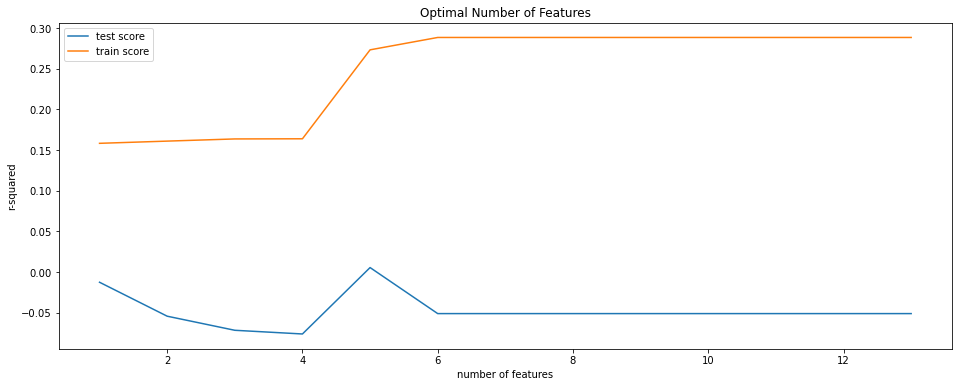

In [253]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

Final model.


In [254]:
n_features_optimal = 5

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

In [255]:
X_test

,"Students, school children, conscripts and civil service",Taxable income per housing association,Married couple without children,"One-person hh, All ages, %","Morbidity, Disability pension index",Elementary or unknown
code,,,,,,
335,0.048780,55220.0,0.255656,0.253929,110.505620,0.151452
453,0.038732,38060.0,0.304348,0.253713,103.566801,0.317201
270,0.042984,50715.0,0.145946,0.220776,103.689250,0.212329
303,0.031693,176046.0,0.348315,0.335392,82.743505,0.158088
402,0.044188,55026.0,0.300045,0.169054,86.822935,0.305911
70,0.036354,93610.0,0.316174,0.276256,43.092436,0.146284
381,0.042735,38163.0,0.277047,0.235275,105.602638,0.342773
461,0.039353,45479.0,0.312057,0.290463,112.076408,0.174713
545,0.048554,37427.0,0.271323,0.272904,112.945511,0.369990


In [256]:
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.01596623646300699
